In [2]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Data Description

The data in both datasets are collected from the user information from https://plaicraft.ai/.

In [3]:
player_data <- read_csv("data/players.csv")

head(player_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [4]:
nrow(player_data)

[1] 196

In [5]:
summary(player_data)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [6]:
unique(select(player_data, experience))

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


In [7]:
unique(select(player_data, gender))

gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


### Player Data
The dataset containing player data (players.csv) has 196 observations and 6 variables:
- experience (string): player's experience in this video game
  - values: Pro, Veteran, Amateur, Regular, Beginner
- subscribe (logical): Is the player subscribed?
- hashedEmail (string): hash of the player's email address
- played_hours (numerical): number of hours played by the player
  - Minimum: 0 hours, Maximum: 223.1 hours, Mean: 5.85 hours, Median: 0.1 hours
- name (string): name of the player
- gender (string): gender of the player
  - values: Male, Female, Non-binary, Prefer not to say, Agender, Two-spirited, Other
- Age (numerical): age of the player
  - Minimum: 9, Maximum: 58, Mean: 21.14, Median: 19 (this column has some 2 missing values)

In [8]:
session_data <- read_csv("data/sessions.csv")

head(session_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [9]:
nrow(session_data)

[1] 1535

In [10]:
summary(session_data)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

### Session Data
The dataset containing session data (sessions.csv) has 1535 observations and 5 variables:
- hashedEmail (string): hash of the player's email address
- start_time (string): date and time of the session start
- end_time (string): date and time of the session end
- original_start_time (numerical): timestamp for the session start
- original_end_time (numerical): timestamp for the session end (this column has 2 missing values)

# Questions

I will address this broad question: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

In order to address this, I'll try to explore this more specific question: Can experience, subscribe status, gender, and age predict the number of hours played in the player dataset (players.csv)?
The available data will be helfpul with this question since there are many observation with various values for these variables that might be helpful to predict the number of hours played in the player dataset. I haven't included the hashed email and name as explanatory variables since they likely have no effect on the prediction and are generally unique.

To use the regression models (e.g. linear regression), I'll need to transform:
- experience variable into integer scale from 1 to 5. 
- subscribe variable to 0s and 1s.
- gender variable by creating 7 new variables for each value and each of these new variables should have 0s and 1s to indicate if the player's gender is equal to the variable.
- the age variable by splitting it into groups since the relationship between the two variables is not linear

# Exploratory Data Analysis and Visualization
Mean value of each quantitative variable in players.csv data set:

|Variable|Mean|
|---|---|
|played_hours|5.85|
|Age|21.14|

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


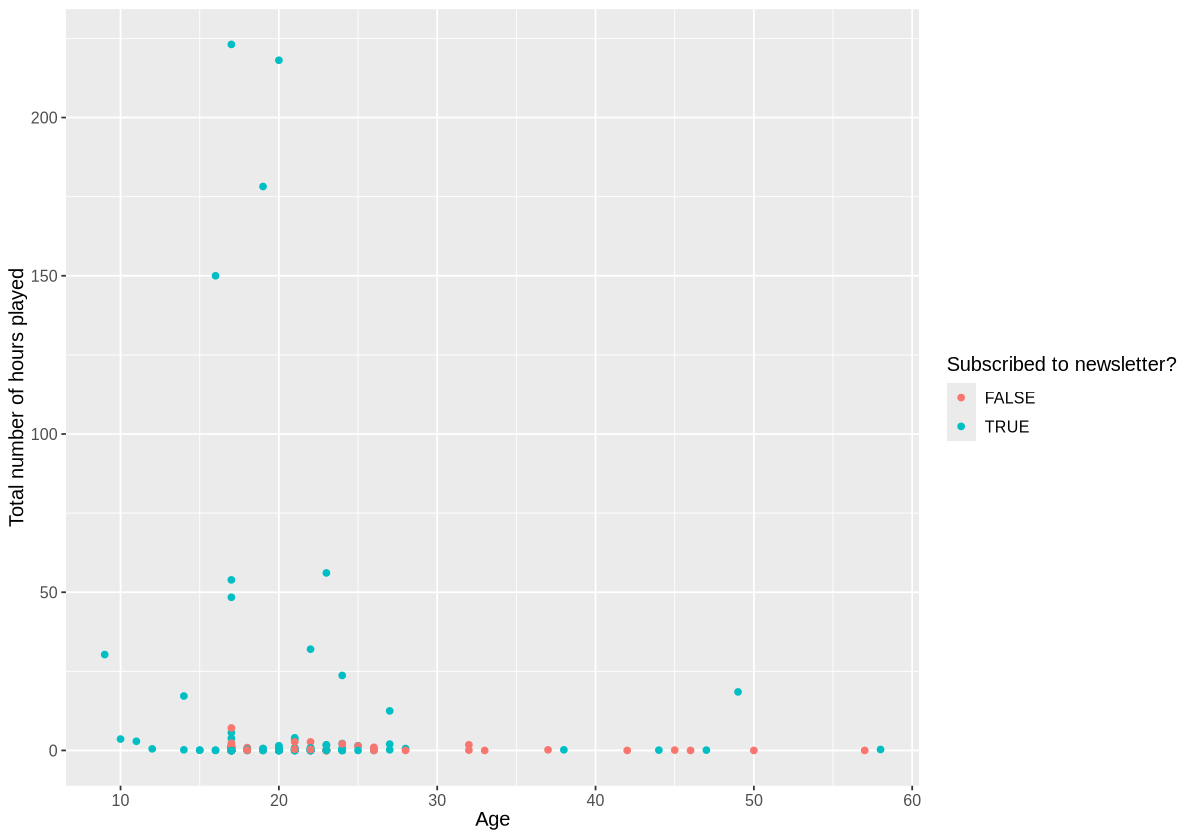

In [11]:
options(repr.plot.width = 10)

ggplot(player_data, aes(x=Age, y=played_hours, color = subscribe)) +
    geom_point() +
    labs(x = "Age", y ="Total number of hours played", color = "Subscribed to newsletter?") +
    theme(text = element_text(size = 12))

From this plot it seems like people between the ages 15 and 25 are more likely to play for more hours. Also, it seems like people that are subscribed to the newsletter are also more likely to play more.

Warning message:
“Removed 70 rows containing missing values or values outside the scale range
(`geom_bar()`).”


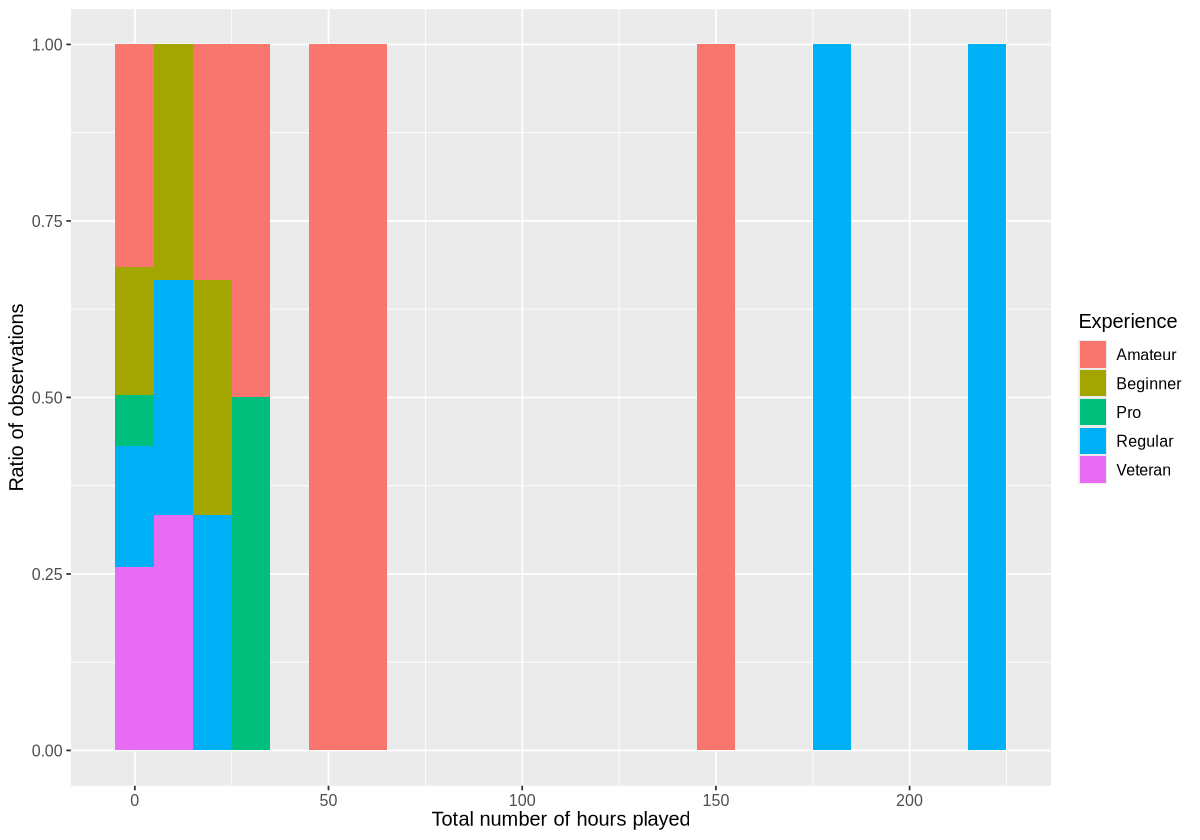

In [12]:
player_data |>
    ggplot(aes(x=played_hours, fill=experience)) +
    geom_histogram(position = "fill", binwidth = 10) +
    labs(x = "Total number of hours played", y ="Ratio of observations", fill = "Experience") +
    theme(text = element_text(size = 12))

There seems to be some relationship between experience and number of hours player by the player. However, the realtionship doesn't look positive/negative (i.e. more experienced player plays more/less hours), instead it seems like players that play the most are amateur or regular.